In [5]:
import uproot
import numpy as np
from scipy.stats import gamma, kstest
import matplotlib.pyplot as plt
import pandas as pd
import mplhep as hep
from scipy import stats

import os
plt.style.use(hep.style.ATLAS)

<>:37: SyntaxWarning: invalid escape sequence '\T'
<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\T'
<>:37: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_77257/3180598392.py:37: SyntaxWarning: invalid escape sequence '\T'
  ax1.text(0.65, 0.30, f'Material:{MaterialName}\nGamma distribution\nFitted params:\nshape (k): {fit_shape:.2f}\nscale ($\Theta$): {fit_scale:.2f}\nmean ($\lambda$):{np.mean(data):.4f}\ndistance reach 99%: {sorted_data[np.searchsorted(cdf_fit, 0.99)]:.3f} mm\np-value: {np.mean(gamma_p_values):.4f}', transform=ax1.transAxes, fontsize=10,
/tmp/ipykernel_77257/3180598392.py:37: SyntaxWarning: invalid escape sequence '\l'
  ax1.text(0.65, 0.30, f'Material:{MaterialName}\nGamma distribution\nFitted params:\nshape (k): {fit_shape:.2f}\nscale ($\Theta$): {fit_scale:.2f}\nmean ($\lambda$):{np.mean(data):.4f}\ndistance reach 99%: {sorted_data[np.searchsorted(cdf_fit, 0.99)]:.3f} mm\np-value: {np.mean(gamma_p_val


Gamma:
Average KS p-value: 0.6839
Median: 0.7384, Fraction >0.05: 1.00


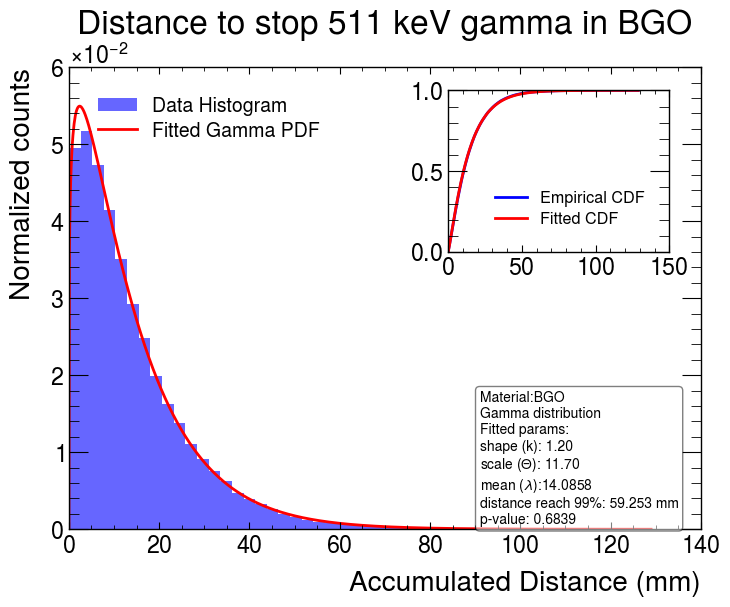


Gamma:
Average KS p-value: 0.6005
Median: 0.6212, Fraction >0.05: 1.00


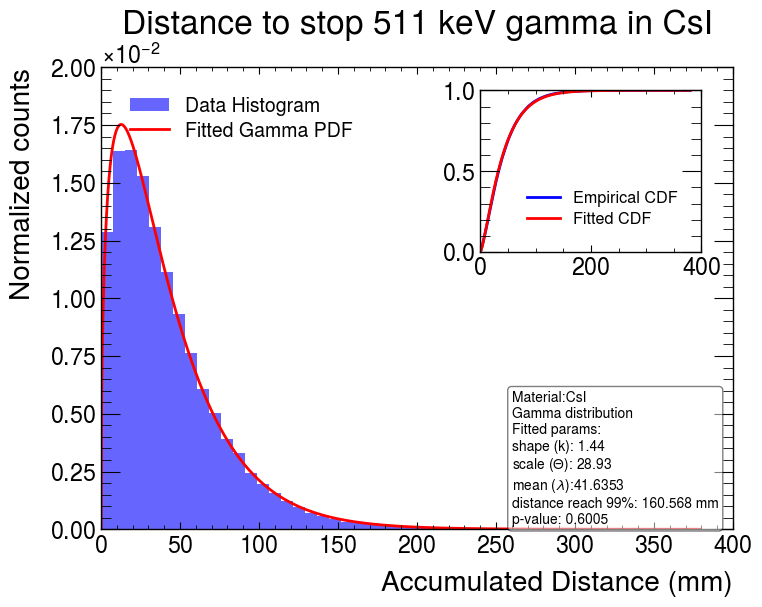


Gamma:
Average KS p-value: 0.5790
Median: 0.5964, Fraction >0.05: 0.99


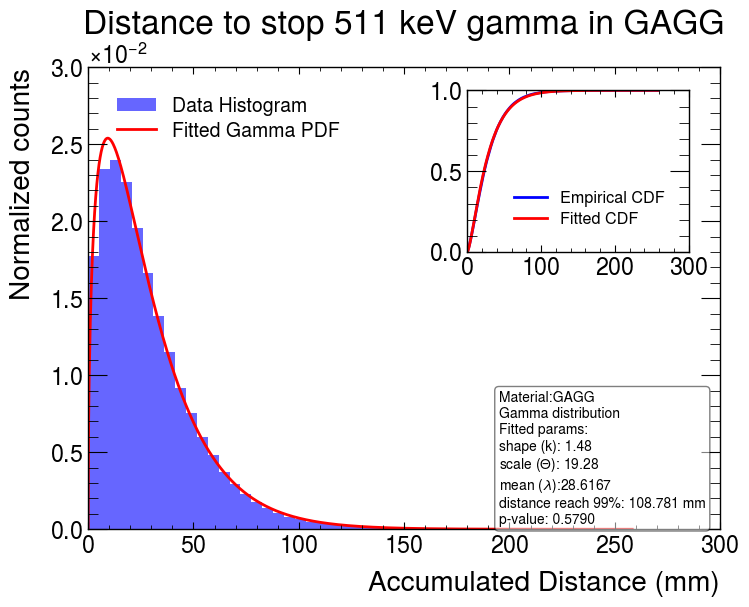


Gamma:
Average KS p-value: 0.5023
Median: 0.4939, Fraction >0.05: 0.98


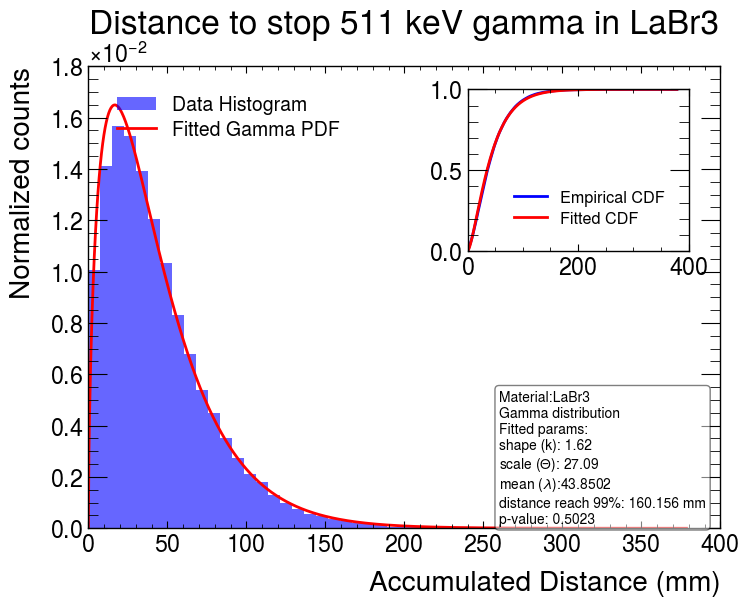


Gamma:
Average KS p-value: 0.6082
Median: 0.6385, Fraction >0.05: 0.99


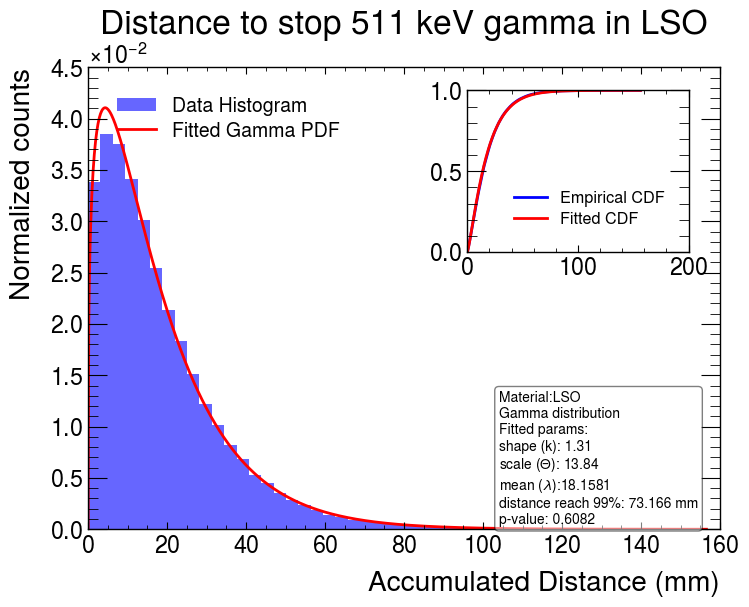


Gamma:
Average KS p-value: 0.5811
Median: 0.5906, Fraction >0.05: 0.99


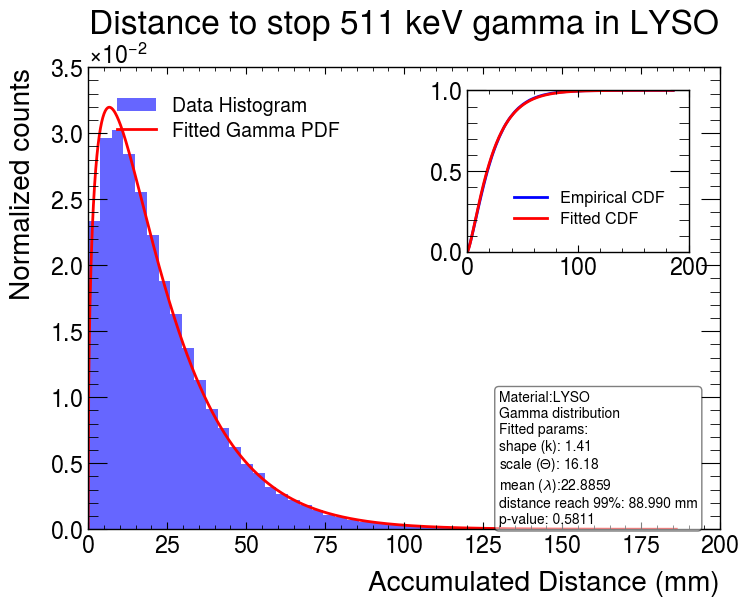


Gamma:
Average KS p-value: 0.5511
Median: 0.5665, Fraction >0.05: 0.99


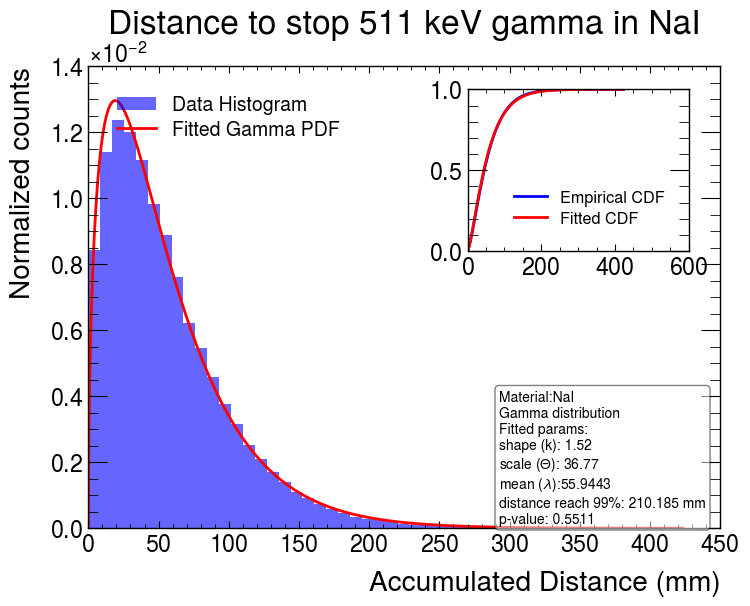

In [13]:
file_names=["BGO.root","CsI.root","GAGG.root","LaBr3.root","LSO.root","LYSO.root","NaI.root"]
for i in range(len(file_names)):
    MaterialName=file_names[i].split(".")[0]
    data=np.array(uproot.open(file_names[i])["Tracker"]["AccumulatedDistance_mm"].array())
    fit_shape, fit_loc, fit_scale = gamma.fit(data, floc=0)
    # Parameters
    subsample_size = 1000  
    num_subsamples = 1000
    gamma_p_values = []
    for _ in range(num_subsamples): #randomly sample num_subsamples times then cinoyte the kstest fit p-value
        subsample = np.random.choice(data, size=subsample_size, replace=False)
        g_shape, g_loc, g_scale = stats.gamma.fit(subsample, floc=0)
        ks = stats.kstest(subsample, 'gamma', args=(g_shape, g_loc, g_scale))
        gamma_p_values.append(ks.pvalue)
    print("\nGamma:")
    print(f"Average KS p-value: {np.mean(gamma_p_values):.4f}")
    print(f"Median: {np.median(gamma_p_values):.4f}, Fraction >0.05: {np.mean(np.array(gamma_p_values) > 0.05):.2f}")
    # Plot histogram, fitted PDF, and optional CDF for visual check
    fig, ax1 = plt.subplots()
    # Histogram and PDF
    ax1.hist(data, bins=50, density=True, alpha=0.6, color='blue', label='Data Histogram')
    x = np.linspace(0, max(data), 1000)
    pdf_fitted = gamma.pdf(x, a=fit_shape, loc=fit_loc, scale=fit_scale)
    ax1.plot(x, pdf_fitted, 'r-', label='Fitted Gamma PDF')
    ax1.set_xlabel('Accumulated Distance (mm)')
    ax1.set_ylabel('Normalized counts')
    ax1.legend(loc='upper left')
    # Optional: Add empirical vs fitted CDF inset for KS visual
    ax2 = ax1.inset_axes([0.6, 0.6, 0.35, 0.35])
    sorted_data = np.sort(data)
    cdf_emp = np.arange(len(data)) / float(len(data))
    cdf_fit = gamma.cdf(sorted_data, a=fit_shape, loc=fit_loc, scale=fit_scale)
    ax2.plot(sorted_data, cdf_emp, 'b-', label='Empirical CDF')
    ax2.plot(sorted_data, cdf_fit, 'r-', label='Fitted CDF')
    # put following commment in big plot right left corner
    # put parameters
    ax1.text(0.65, 0.30, f'Material:{MaterialName}\nGamma distribution\nFitted params:\nshape (k): {fit_shape:.2f}\nscale ($\Theta$): {fit_scale:.2f}\nmean ($\lambda$):{np.mean(data):.4f}\ndistance reach 99%: {sorted_data[np.searchsorted(cdf_fit, 0.99)]:.3f} mm\np-value: {np.mean(gamma_p_values):.4f}', transform=ax1.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    #ax2.set_xlabel('Accumulated Distance (mm)', fontsize='small')
    #ax2.set_ylabel('CDF', fontsize='small')
    ax2.set_ylim(0, 1)
    ax2.legend(fontsize='small')
    plt.title("Distance to stop 511 keV gamma in "+MaterialName)
    plt.savefig(f'plots/Gamma_Fit_{MaterialName}.png', dpi=300)
    plt.show()
    

/tmp/ipykernel_77257/4293355293.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  data = np.array(uproot.open(filename)["Tracker"]["AccumulatedDistance_mm"].array())


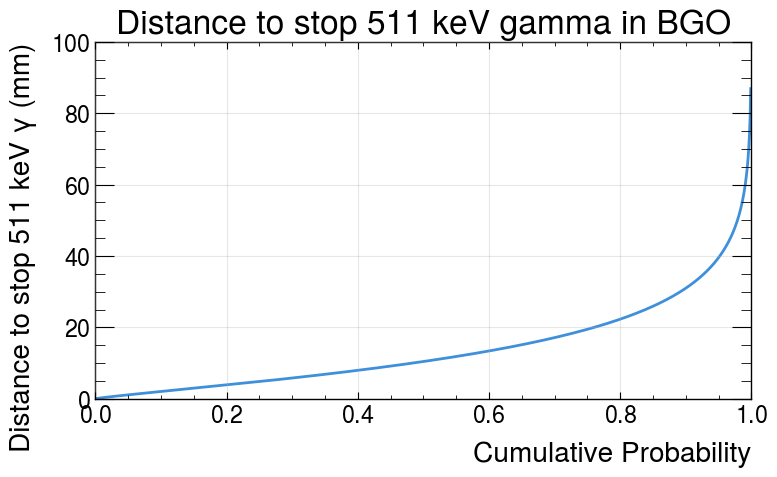

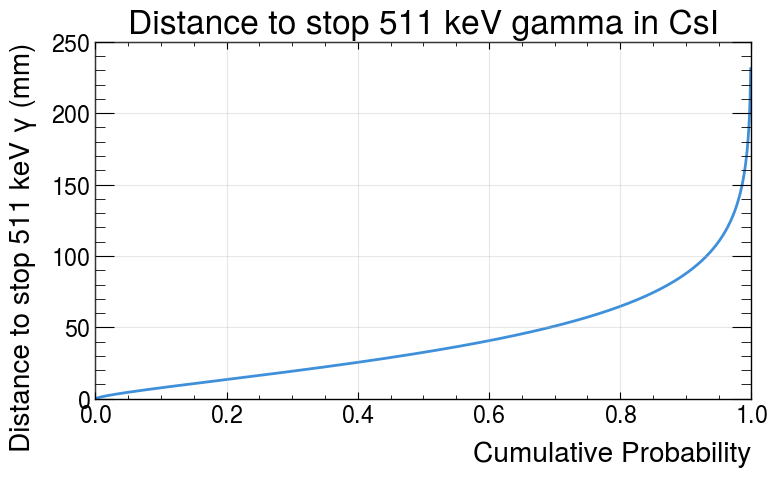

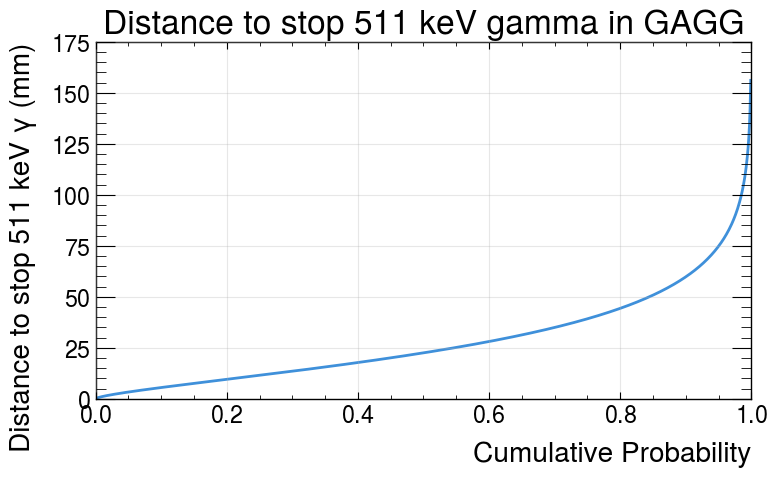

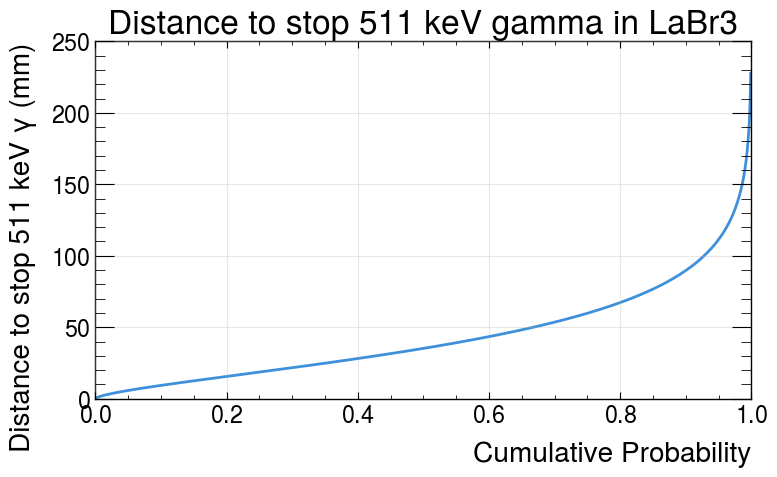

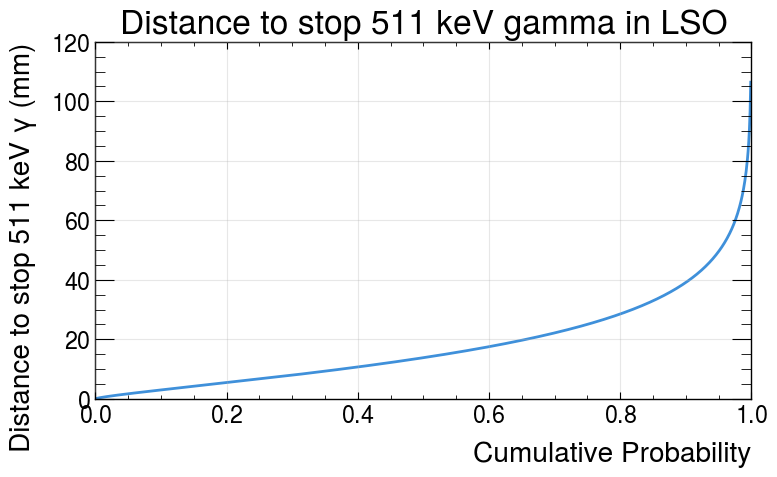

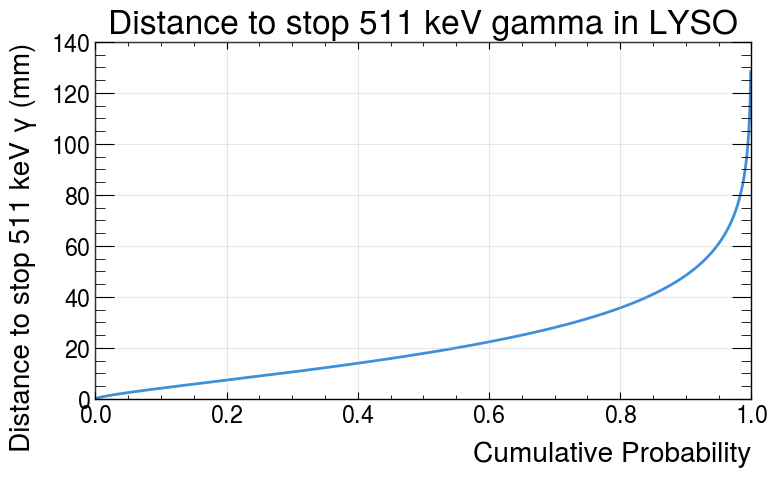

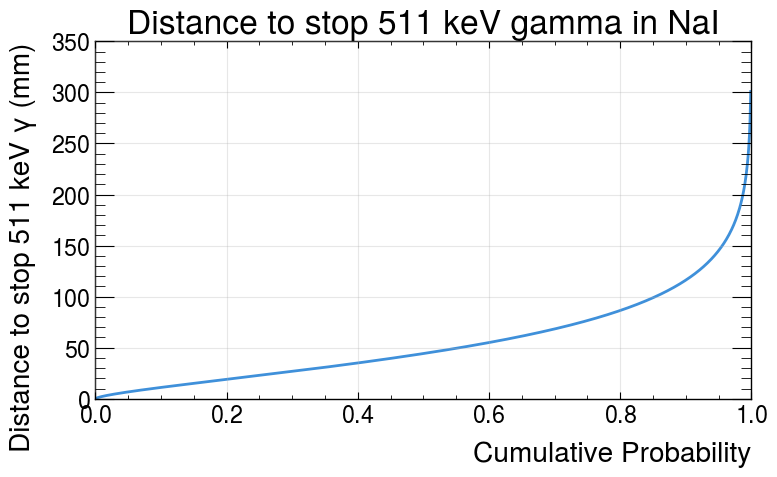

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.stats import gamma

file_names = ["BGO.root","CsI.root","GAGG.root","LaBr3.root",
              "LSO.root","LYSO.root","NaI.root"]

for filename in file_names:
    MaterialName = filename.split(".")[0]
    data = np.array(uproot.open(filename)["Tracker"]["AccumulatedDistance_mm"].array())
    shape, loc, scale = gamma.fit(data, floc=0)
    probs = np.linspace(0, 1, 1000)
    distances = gamma.ppf(probs, a=shape, loc=loc, scale=scale)
    plt.figure(figsize=(8,5))
    plt.plot(probs, distances)
    plt.xlabel("Cumulative Probability")
    plt.ylabel("Distance to stop 511 keV γ (mm)")
    plt.title(f"Distance to stop 511 keV gamma in {MaterialName}")
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, None)
    plt.tight_layout()
    plt.savefig(f'plots/Distance_to_stop_511keV_gamma_in_{MaterialName}.png',
                dpi=300, bbox_inches='tight')
    plt.show()